# Does health expenditure depend on economic status or education level?


## Environment Setup


The following code:

1. Imports the necessary libraries; `matplotlib`, `pandas` and `seaborn`.
2. Sets the theme with style `ticks`; font `Verdana`; palette of pastel green, yellow, and red; and context `paper`.
3. Sets the figure size to 300 DPI for larger resolution outputs.
4. Loads the clean dataset.


In [296]:
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(
    style="ticks",
    font="Verdana",
    palette=sns.color_palette(["#77dd77", "#ffb347", "#ff6961"]),
    context="paper",
)

mpl.rcParams["figure.dpi"] = 300

df = pd.read_csv("../dataset/clean.csv")

## Health Expenditure and Economic Status


The following code:

1. Sets title and labels.
2. Creates the box plot with economic status at X-axis, education level at hue and health expenditure at Y-axis.
3. Creates the swarm plot with the same dimensions to be overlayed on the box plot, so that individual data points are visible.
4. Hides redundant swarm plot hue descriptions from the legend.
5. Displays the plot.


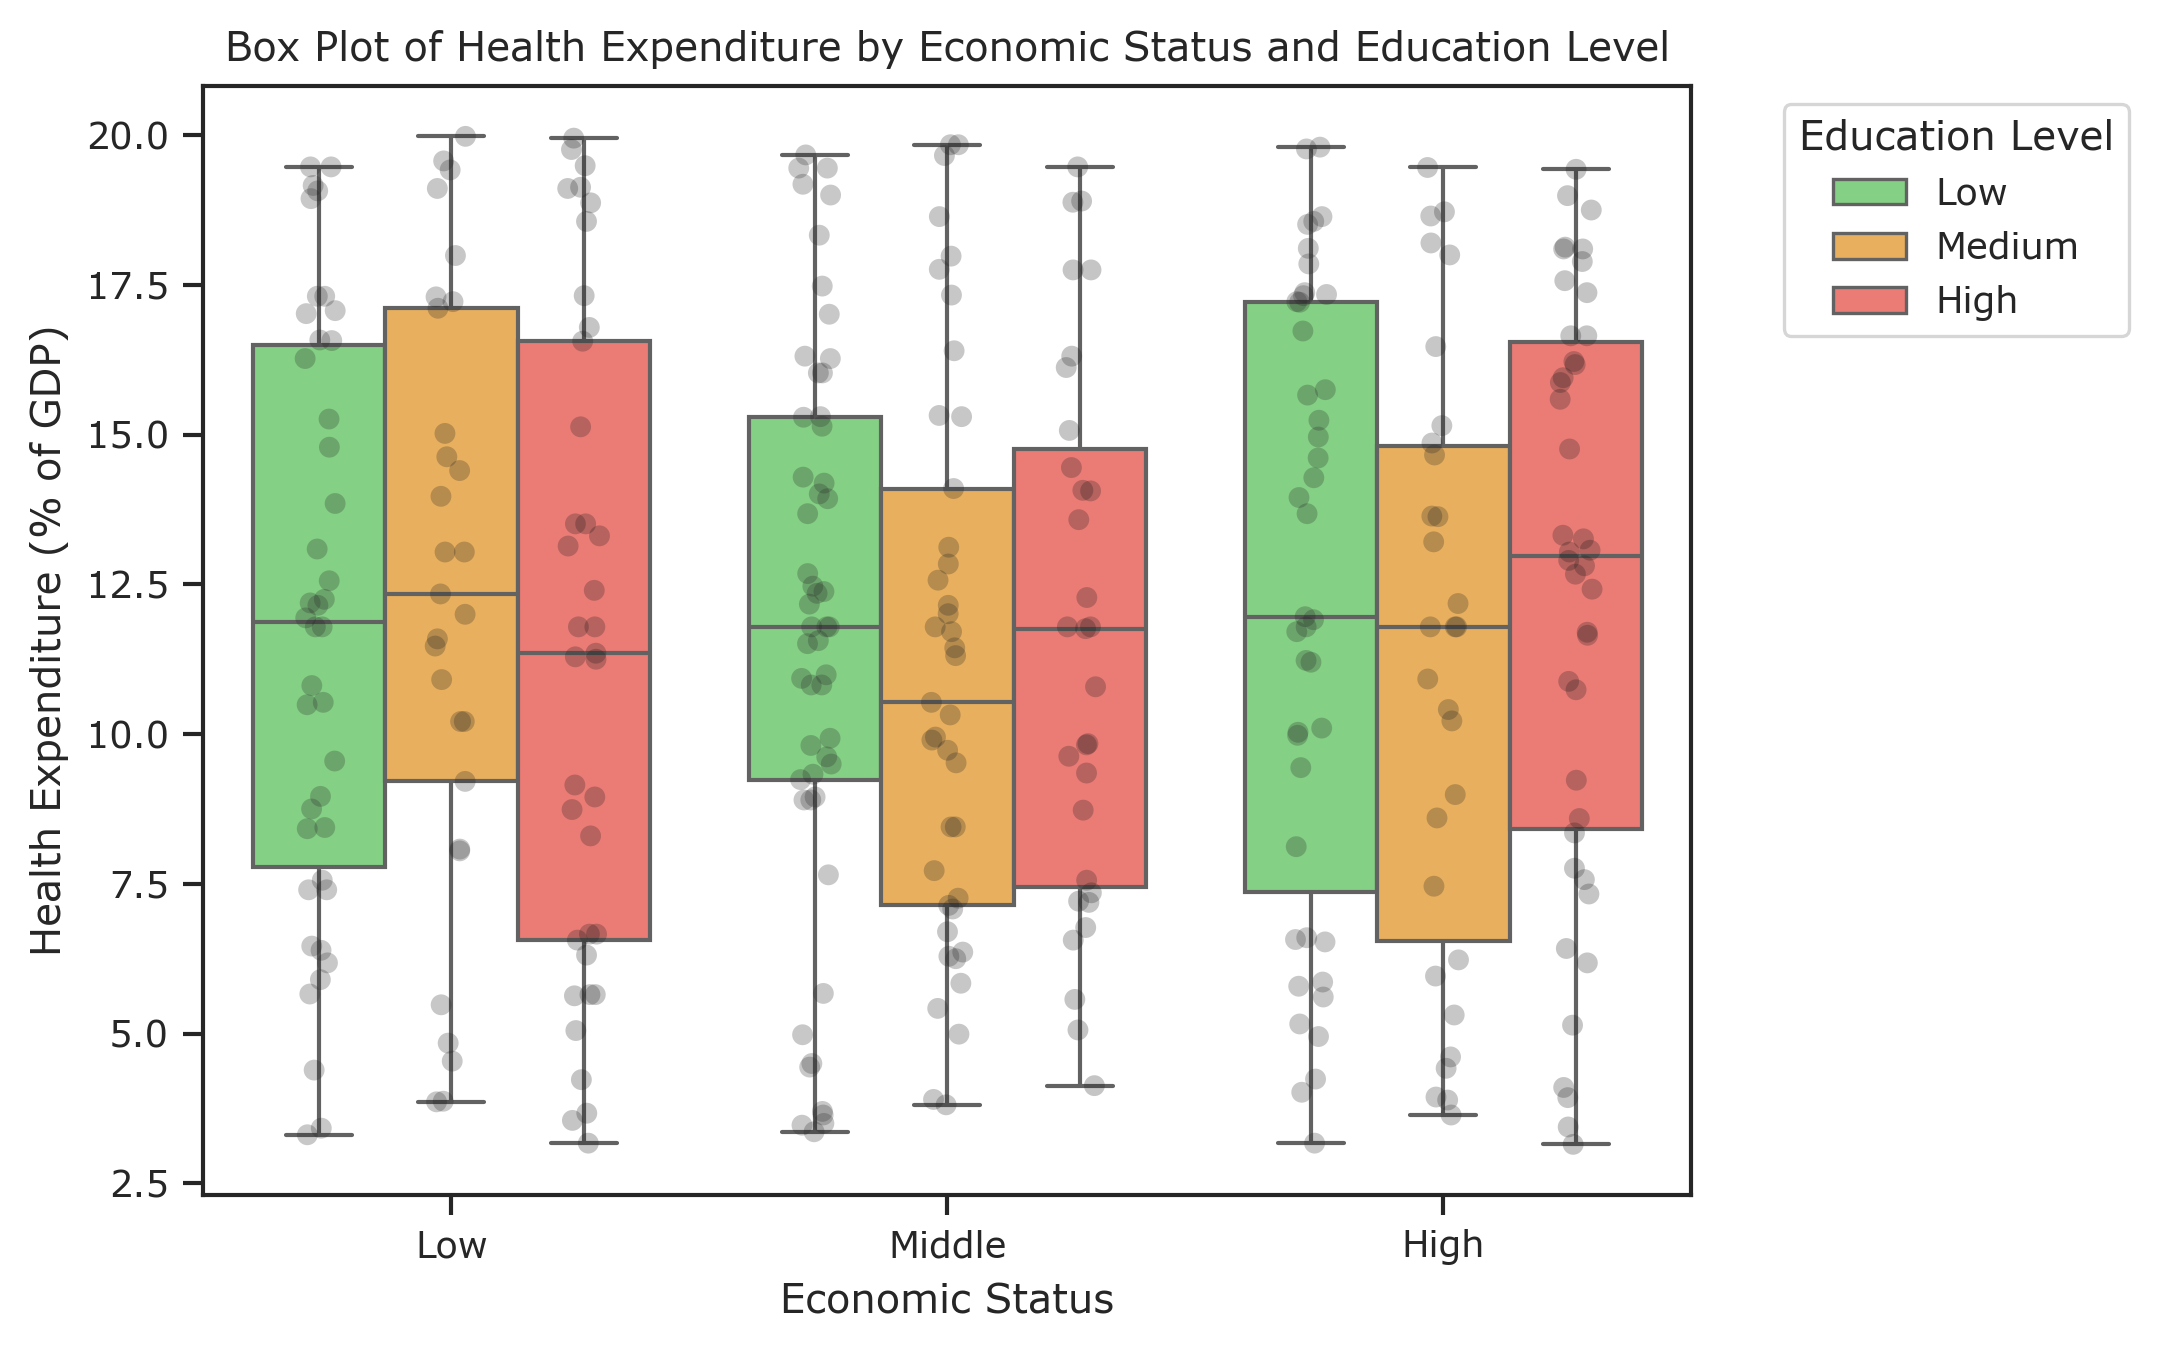

In [297]:
plt.title("Box Plot of Health Expenditure by Economic Status and Education Level")
plt.xlabel("Economic Status")
plt.ylabel("Health Expenditure (% of GDP)")

sns.boxplot(
    x="economic_status",
    y="health_expenditure_gdp",
    hue="education_level",
    data=df,
    order=["Low", "Middle", "High"],
    hue_order=["Low", "Medium", "High"],
)

sns.stripplot(
    x="economic_status",
    y="health_expenditure_gdp",
    hue="education_level",
    data=df,
    order=["Low", "Middle", "High"],
    hue_order=["Low", "Medium", "High"],
    dodge=True,
    jitter=True,
    marker="o",
    alpha=0.25,
    palette="dark:k",
)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles[:3],
    labels[:3],
    title="Education Level",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

plt.show()

## Unused Graphs

These graphs have been created to explore the data at a high level. They are not used in the final analysis as the graph above seemed to be the most relevant to the research question.


### Health Expenditure and Education Level


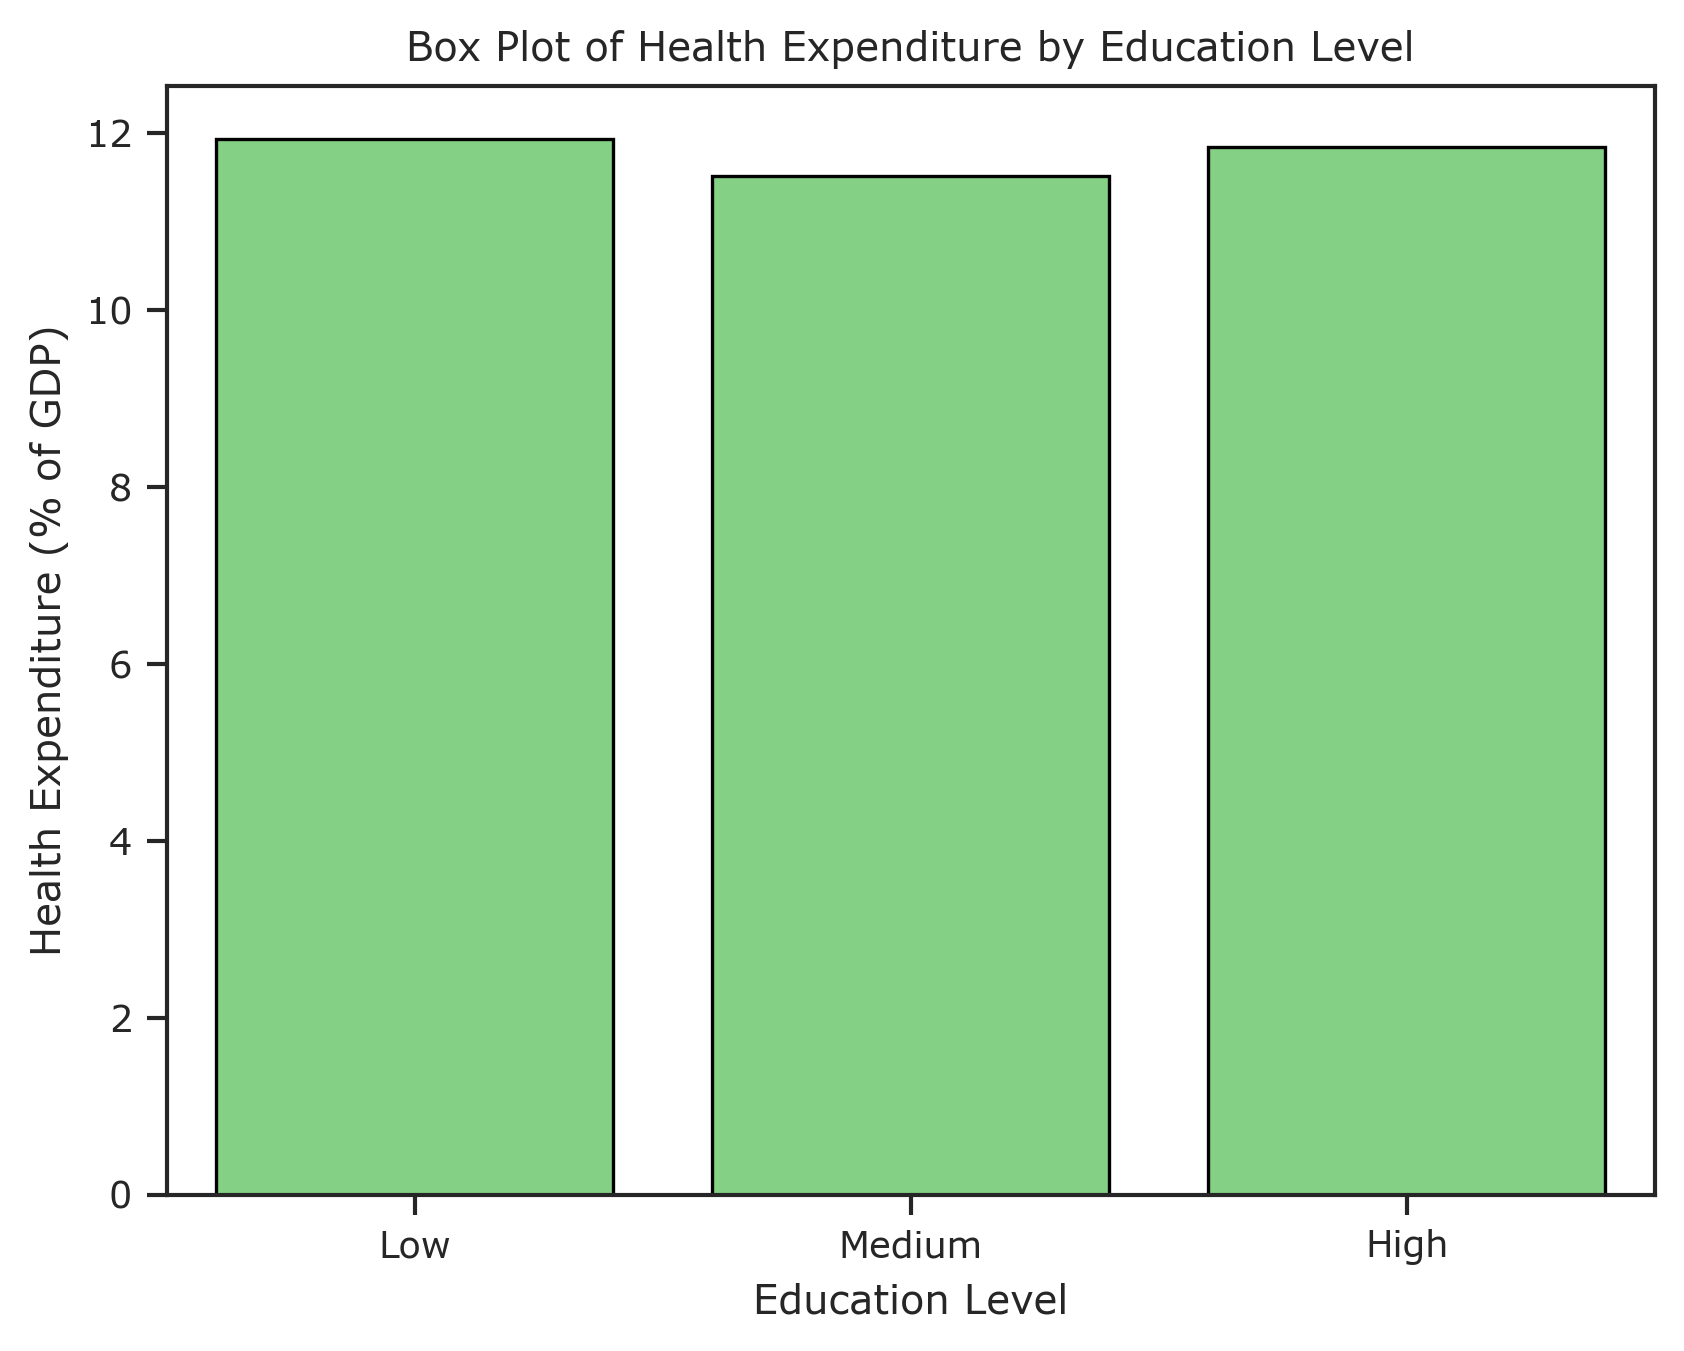

In [298]:
by_economic_status = (
    df.groupby("education_level")["health_expenditure_gdp"].mean().reset_index()
)

sns.barplot(
    x="education_level",
    y="health_expenditure_gdp",
    data=by_economic_status,
    order=["Low", "Medium", "High"],
    errorbar=None,
    edgecolor="black",
)

plt.title("Box Plot of Health Expenditure by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Health Expenditure (% of GDP)")

plt.show()

### Average Health Expenditure by Year


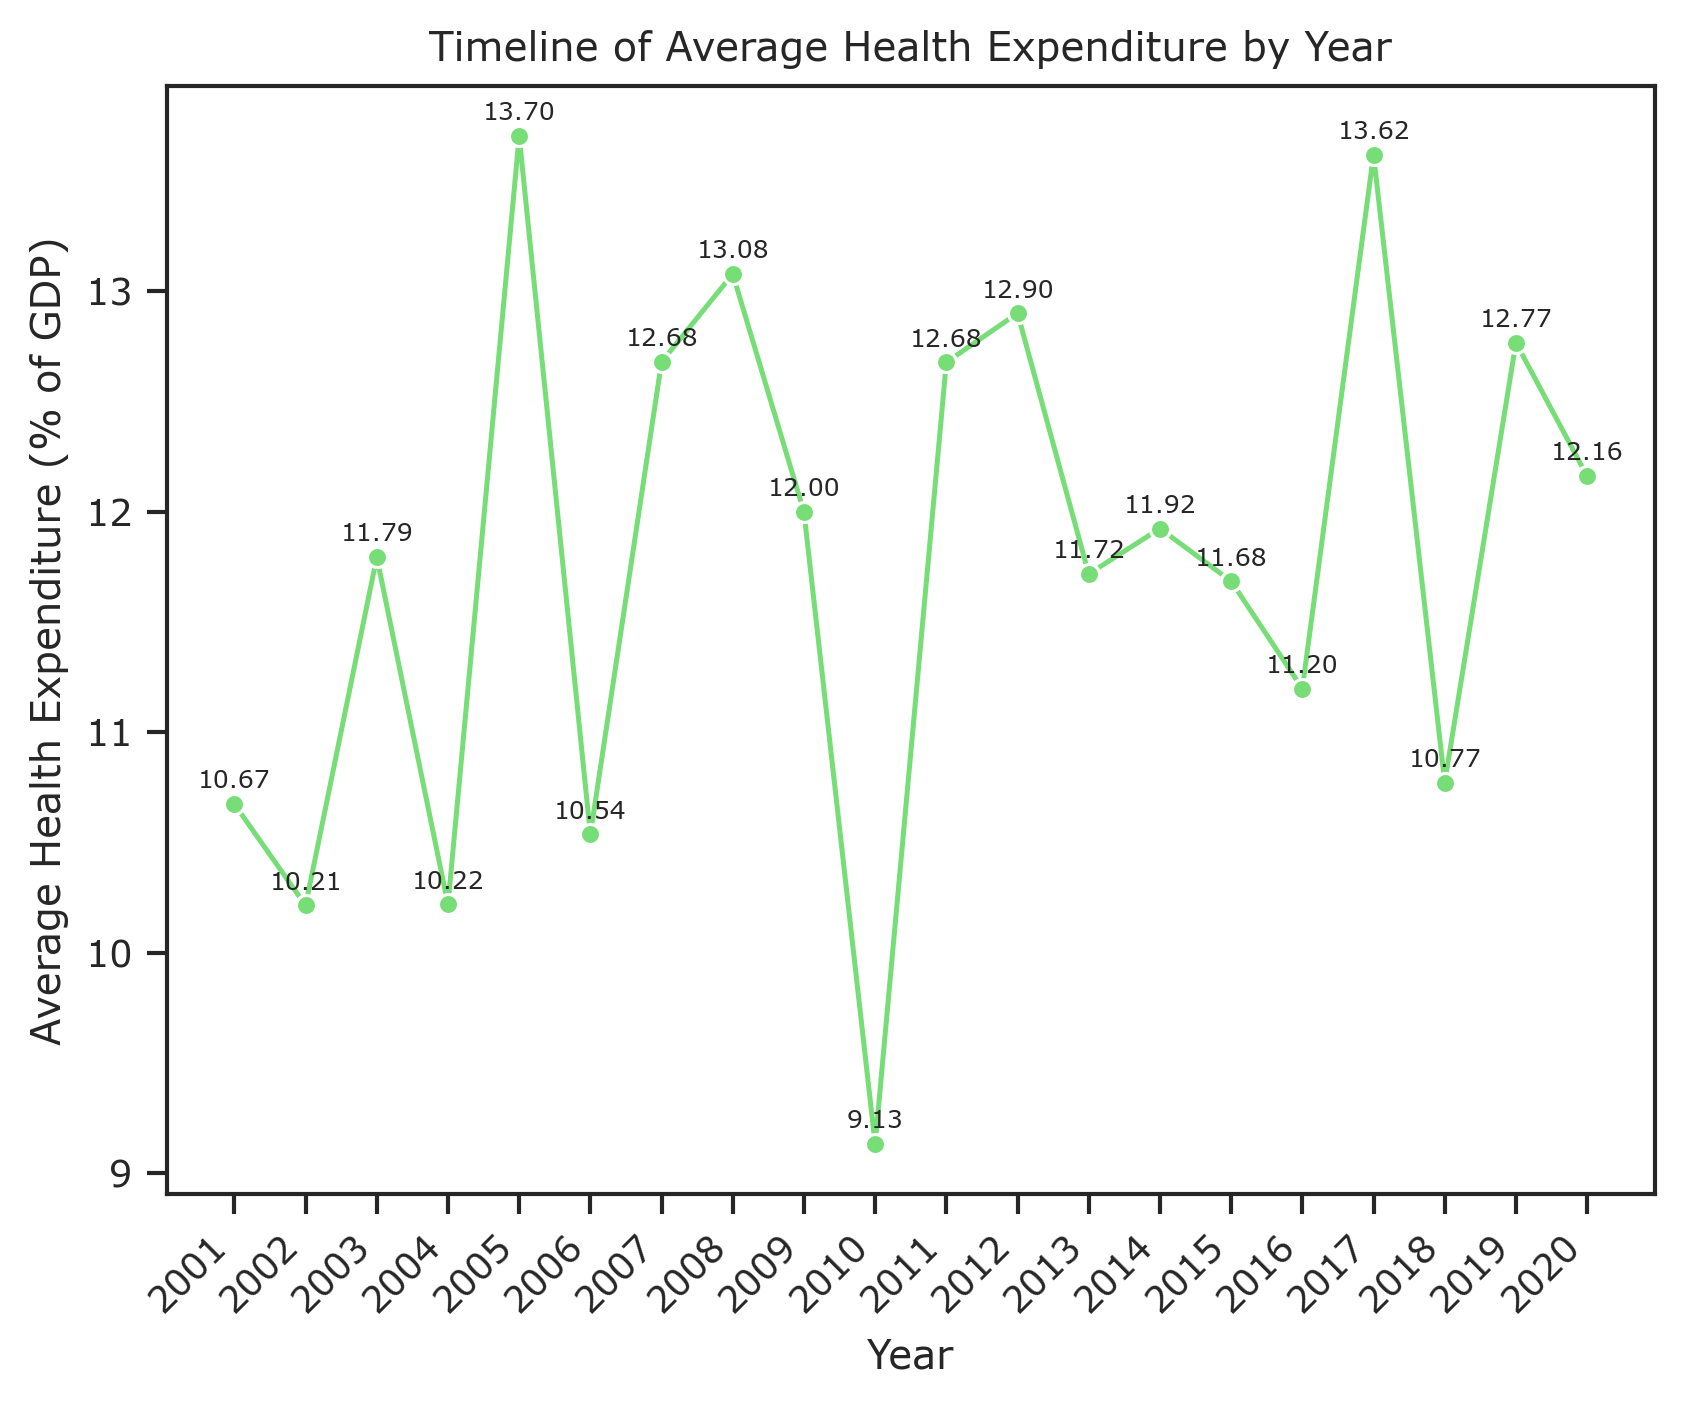

In [299]:
avg_health_expenditure_yearly = (
    df.groupby("year")["health_expenditure_gdp"].mean().reset_index()
)

sns.lineplot(
    x="year", y="health_expenditure_gdp", data=avg_health_expenditure_yearly, marker="o"
)
plt.xticks(avg_health_expenditure_yearly["year"], rotation=45, ha="right")

for x, y in zip(
    avg_health_expenditure_yearly["year"],
    avg_health_expenditure_yearly["health_expenditure_gdp"],
    strict=True,
):
    plt.text(x, y + 0.05, f"{y:.2f}", ha="center", va="bottom", fontsize=6)

plt.title("Timeline of Average Health Expenditure by Year")
plt.xlabel("Year")
plt.ylabel("Average Health Expenditure (% of GDP)")

plt.show()

### Economic Status Distribution by Year


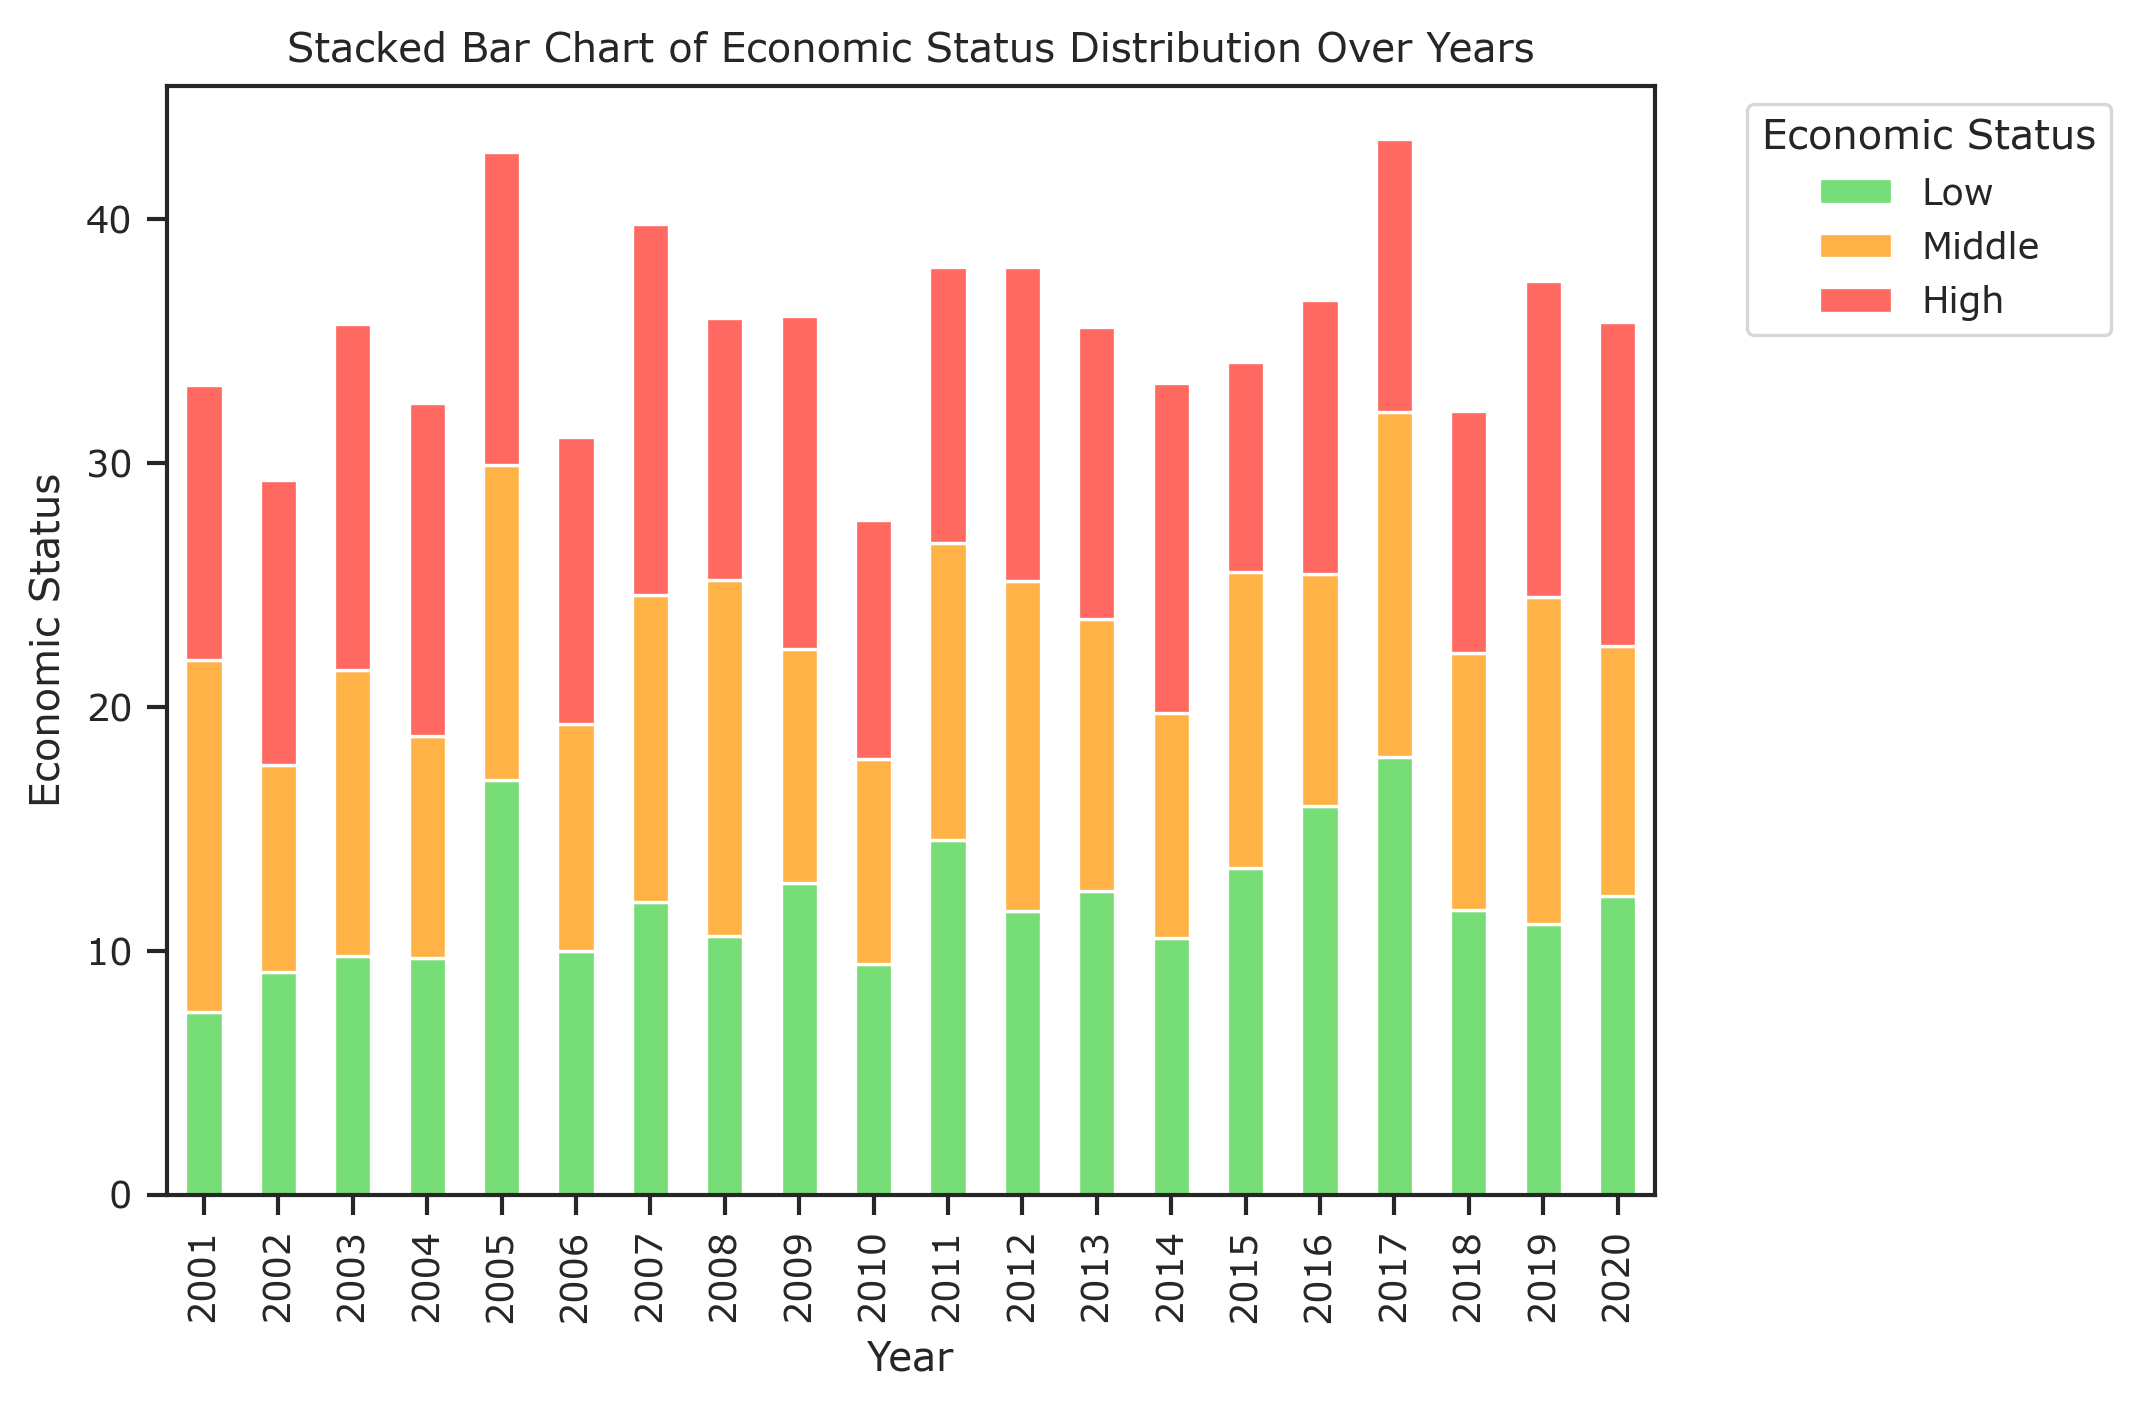

In [300]:
pivot_df = df.pivot_table(
    index="year",
    columns=["economic_status"],
    values="health_expenditure_gdp",
    aggfunc="mean",
)

pivot_df[["Low", "Middle", "High"]].plot(kind="bar", stacked=True)

plt.title("Stacked Bar Chart of Economic Status Distribution Over Years")
plt.xlabel("Year")
plt.ylabel("Economic Status")
plt.legend(title="Economic Status", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

### Education Level Distribution by Year


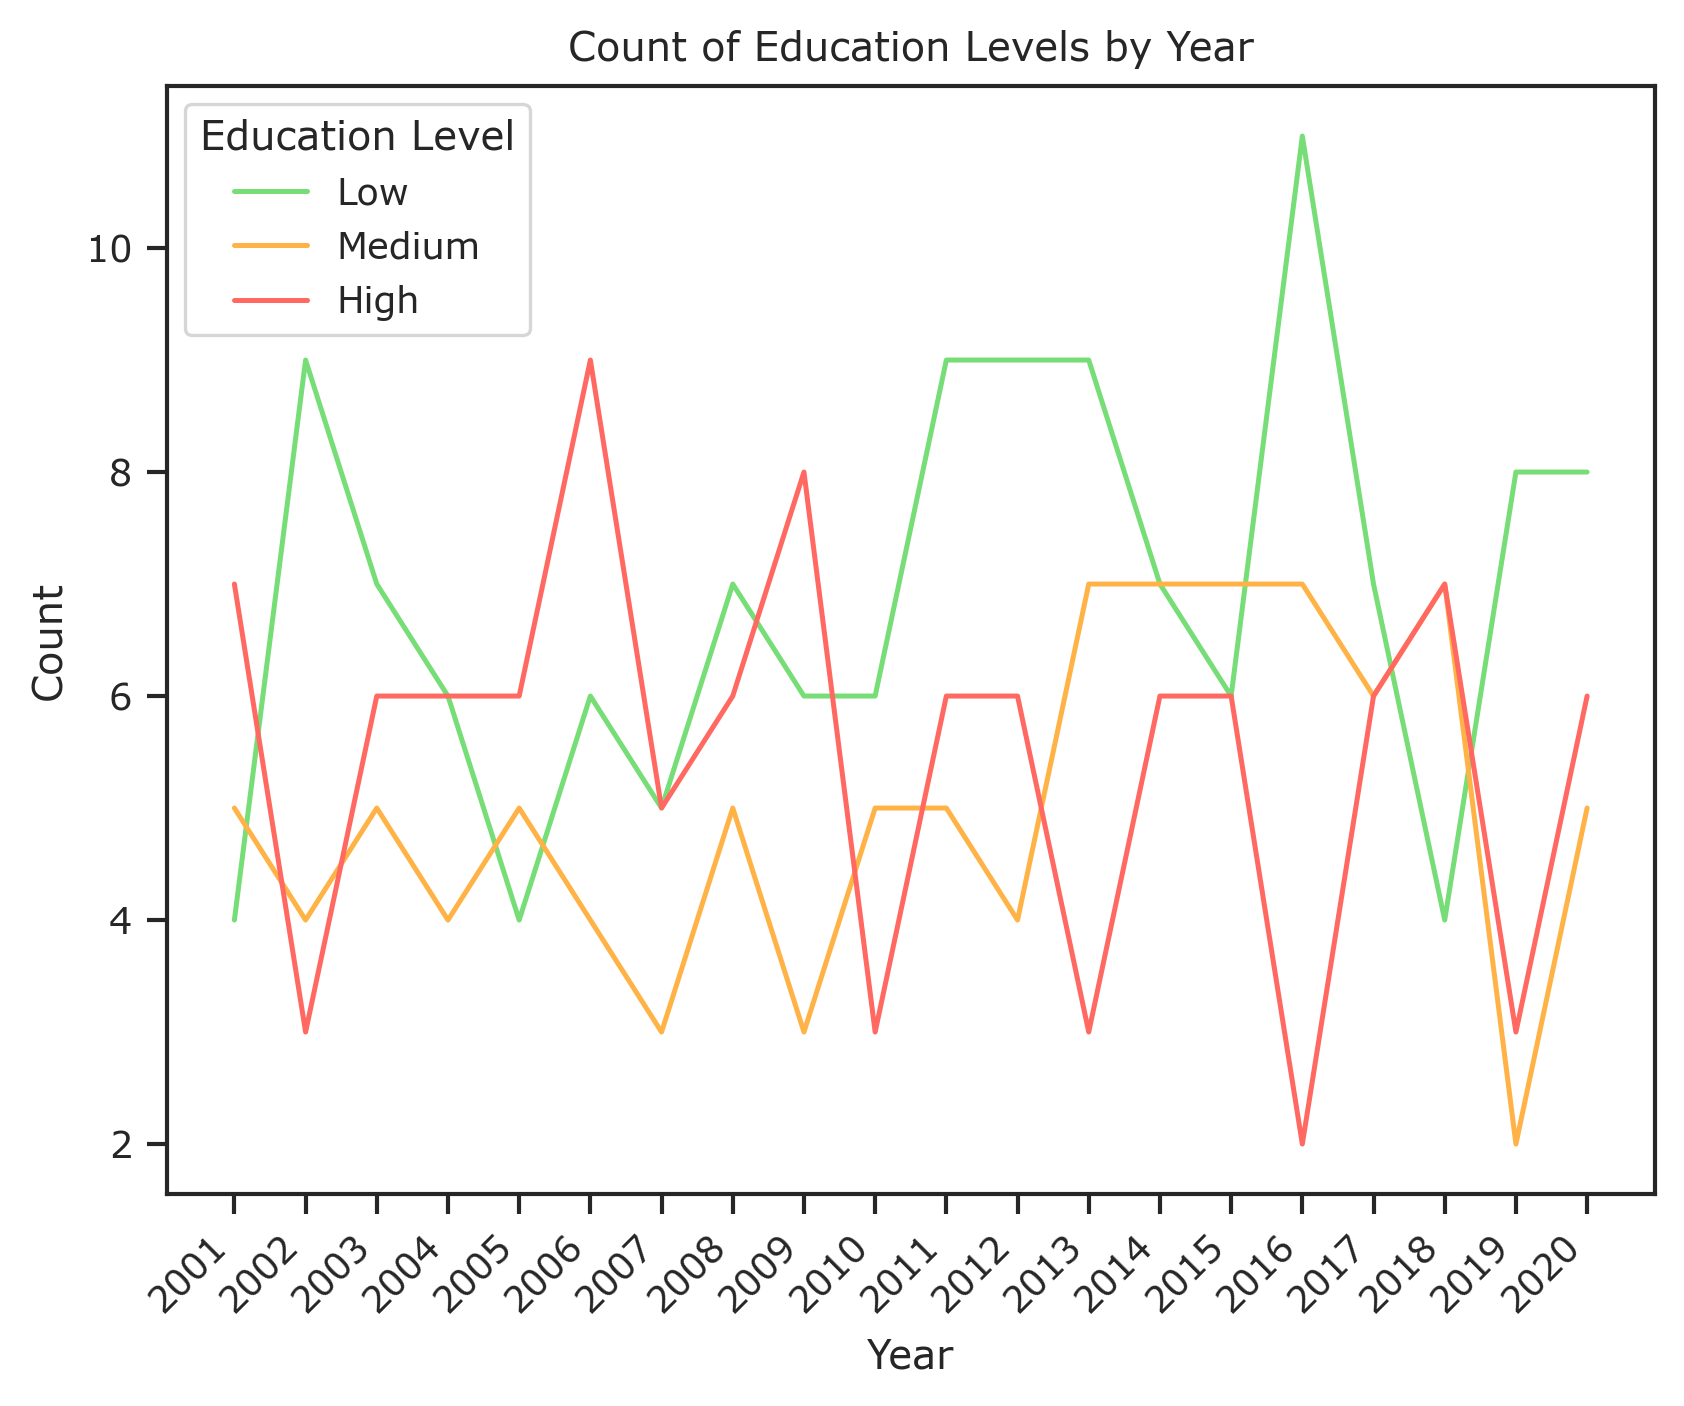

In [301]:
pivot_df = df.pivot_table(
    index="year",
    columns="education_level",
    values="country",
    aggfunc="size",
    fill_value=0,
)

pivot_df[["Low", "Medium", "High"]].plot(kind="line")

plt.title("Count of Education Levels by Year")

plt.xlabel("Year")
plt.xticks(avg_health_expenditure_yearly["year"], rotation=45, ha="right")
plt.ylabel("Count")

plt.legend(title="Education Level")

plt.show()